# PDE trong bài báo NCKH cấp trường "Nghiên cứu trí tuệ trong giải PDE"

In [2]:
!pip install autograd

In [0]:
#Một số hàm thư viện
import autograd
import autograd.numpy as np
from autograd import grad, jacobian, hessian
from autograd import elementwise_grad as egrad
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Định nghĩa các hàm

def solution(x):
	return np.exp(-x[0])*(x[0]+x[1]**3)

def sigmoid(x):
    return 1./(1+np.exp(-x))

def sigmoid1(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def Q(x,e):
  x0 = e*(x[0] + 1)
  x1 = e *(x[1] +1)
  xt = np.array([x0,x1])
  return xt;

def make_array_random(m,n):
    a = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            a[i][j] = np.random.rand()
    return a

def f(x):
    return np.exp(-x[0])*(x[0]-2+x[1]**3+6*x[1])

def A(x):
    return (1-x[0])*x[1]**3 + x[0]*(1+x[1]**3)*np.exp(-1) + (1-x[1])*x[0]*(np.exp(-x[0])-np.exp(-1)) + x[1]*((1+x[0])*np.exp(-x[0]) - (1-x[0]+2*x[0]*np.exp(-1)))
                  
def yTrial(x,net_out):
    return A(x) + x[0]*(1-x[0])*x[1]*(1-x[1])*net_out

def network_netout(x, Win,Wout ):  # x la vector [x1,x2]
    wt = sigmoid(np.dot(x,Win))
    return ((np.dot(wt,Wout))) # tra ve 1 vector

In [0]:
# Viet hai hàm vẽ đồ thị

def drawFunc(title,xs,ys,Z,zMin,zMax,face,c):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    if face:
        ax.plot_surface(X,Y,Z,color=c)
    else:
        ax.plot_wireframe(X,Y,Z,color=c)
    ax.view_init(azim=230)
    plt.show()
    
   
def draw2Func(title,xs,ys,Z1,Z2,zMin,zMax,face): # Vẽ 2 hàm cùng nhau để so sánh độ fit 
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xs,ys)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(xs.min(),xs.max())
    ax.set_ylim(ys.min(),ys.max())
    ax.set_zlim(zMin,zMax)
    
    if face:
        ax.plot_surface(X,Y,Z1,color='r',linewidth=3)
        ax.plot_surface(X,Y,Z2,color='b')
    else:
        ax.plot_wireframe(X,Y,Z1,color='r',linewidth=2)
        ax.scatter(X, Y, Z2, s = 100, color = 'b', marker='*')
        #ax.plot_wireframe(X,Y,Z2,color='b',linestyle='--')
        ax.legend(["${Nghiệm\ giải\ tích}$","${Nghiệm\ BP}$"]) 
        
    ax.view_init(azim=230)
    plt.show() 



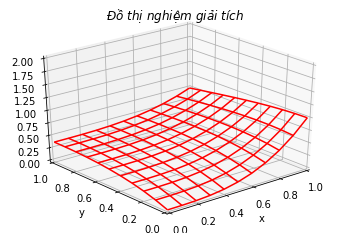

In [47]:
# Rời rạc hóa Domain
k = 11
nx = k
ny = k
xs = np.linspace(0,1,nx)
ys = np.linspace(0,1,ny)
X, Y = np.meshgrid(xs,ys)
# Vẽ đồ thị nghiệm giải tích
Z1 = np.zeros((nx,ny))
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        Z1[i][j] = solution(x)

drawFunc("${Đồ\ thị\ nghiệm\ giải\ tích}$",xs,ys,Z1,0,2,False,'r')

In [48]:
# ---------  Mạng ANN ----------------------
#Khai báo số nút ẩn và định nghĩa hàm loss 
n_hides = 20
Win = np.zeros((2,n_hides))   # reset Tham số
Wout = np.zeros((n_hides,1))
Win = make_array_random(2,n_hides)  # khởi tạo tham số ngẫu nhiên ban đầu 
#print(Win)
Wout = make_array_random(n_hides,1)
#print(Wout)
# Train
def loss_funtion(Win,Wout):
    loss_sum = 0.
    h_yTrial = hessian(yTrial,0)   # h_yTrial là funtion lấy đạo ham bac 2 theo x (=[x1,x2]) cua ham yTrial
                                 # khi áp dụng hàm này cho 1 biến x cụ thể chang hạn x = [1.,2.] ta có
                                 # ma trận hession tại giá trị của biến đó
    for xi in xs:
        for yi in ys:
            x = np.array([xi,yi])
            x = Q(x,0.0001)
            net_out = network_netout(x,Win,Wout)[0]     # [0] vì kết quả đầu ra là 1 mảng          
            grad2_yTrial = h_yTrial(x,net_out)       # mang Hess 2x2 tai x = [xi,yi] = [ [d2fdx1,dfdx1_dfdx2],[dfdx2_dfdx1,d2f_dx2] ]
            func = f(x)  # vế phải
            err = (grad2_yTrial[0][0] + grad2_yTrial[1][1] - func)**2
            loss_sum += err
    return loss_sum


def loss_funtion_1(Win,Wout):    # sửa đổi để vẽ hàm loss
      
    loss_sum = 0.
    h_yTrial = hessian(yTrial)   # h_yTrial là funtion lấy đạo ham bac 2 theo x (=[x1,x2]) cua ham yTrial
                                 # khi áp dụng hàm này cho 1 biến x cụ thể cho g hạn x = [1.,2.] ta có
                                 # ma trận hession tại giá trị của biến đó
    for i, xi in enumerate(xs):
        for j, yi in enumerate(ys):
            
            x = np.array([xi,yi])
            x = Q(x,0.0001)
            net_out = network_netout(x,Win,Wout)[0]     # [0] vì kết quả đầu ra là 1 mảng
            
            grad2_yTrial = h_yTrial(x,net_out)       # mang Hess 2x2 tai x = [xi,yi] = [ [d2fdx1,dfdx1_dfdx2],[dfdx2_dfdx1,d2f_dx2] ]
            
            func = f(x)  # vế phải
            
            err = (grad2_yTrial[0][0] + grad2_yTrial[1][1] - func)**2
            loss_sum += err
            
            Zloss[i][j] = err    # dùng vẽ hàm loss
            
    return loss_sum


# Training ...
epoches = 20
# Dao ham cua ham loss
d_lossFin  = jacobian(loss_funtion,0)    # d_lossFin la 1 Ham (W,x), dao hàm bậc 1 cua loss_function theo Win
d_lossFout = jacobian(loss_funtion,1)    # d_lossFout la 1 Ham (W,x), dao dao hàm bậc 1 cua loss_function theo Wout

# toc do hoc
lmb = 0.001       

Loss = np.zeros(epoches)# Luu cac gia trị mỗi lan lap cua loss function
for i in range(epoches):  # lap epoches lan
    
    Zloss = np.zeros((nx,ny))    # lưu sai số lỗi tại các điểm nội suy dùng để vẽ hàm loss
    # Tính hàm loss và ZLoss
    i_loss = loss_funtion_1(Win,Wout)
    Loss[i] = i_loss;
    print('Loop ',i,' : error = ',i_loss)
    # Cap nhat bộ trọng số win và wout
    md_lossFin = d_lossFin(Win,Wout)   # Áp dụng hàm d_lossFin tại (Win,Wout) ta có Mảng các đạo hàm riêng của hàm Loss tại các giá trị trong Win
    md_lossFout = d_lossFout(Win,Wout) # Áp dụng hàm d_lossFout tại (Win,Wout) ta có Mảng các đạo hàm riêng của hàm Loss tại các giá trị trong Wout
    Win = Win - lmb*md_lossFin
    Wout = Wout - lmb*md_lossFout

# Tham so sau khi huan luyen
print('------------------------------------')
print('Tham so sau khi Huan luyen')
print('------------------------------------')
print('Win')
print(Win)
print('Wout')
print(Wout)

Loop  0  : error =  0.0005403681290133702
Loop  1  : error =  0.0005403676479220127
Loop  2  : error =  0.0005403671668310762
Loop  3  : error =  0.0005403666857405749
Loop  4  : error =  0.0005403662046504814
Loop  5  : error =  0.0005403657235608459
Loop  6  : error =  0.0005403652424716207
Loop  7  : error =  0.0005403647613828339
Loop  8  : error =  0.0005403642802944612
Loop  9  : error =  0.0005403637992065231
Loop  10  : error =  0.0005403633181190136
Loop  11  : error =  0.0005403628370319491
Loop  12  : error =  0.0005403623559452964
Loop  13  : error =  0.0005403618748590942
Loop  14  : error =  0.0005403613937732788
Loop  15  : error =  0.0005403609126878938
Loop  16  : error =  0.0005403604316029827
Loop  17  : error =  0.0005403599505184634
Loop  18  : error =  0.0005403594694343743
Loop  19  : error =  0.0005403589883507367
------------------------------------
Tham so sau khi Huan luyen
------------------------------------
Win
[[0.85533083 0.00540303 0.83904147 0.18787649

In [0]:

Z2 = np.zeros((nx, ny)) # tính giá trị hàm (surface) tại các điểm lưới (nx,ny)
for i, xi in enumerate(xs):
    for j, yi in enumerate(ys):
        x = np.array([xi,yi])
        net_out = network_netout(x, Win,Wout )
        Z2[i][j] = yTrial(x,net_out)# thay bộ trọng số vào hàm yTrial để tính giá trị tại các điểm lưới
#drawFunc("${Đồ\ thị\ nghiệm\ Xấp\ xỉ\ BP}$",xs,ys,Z2,0,2,False,'b')#Vẽ đồ thị nghiệm xấp xỉ yTrial

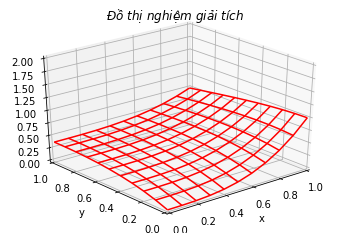

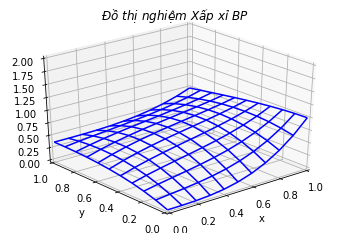

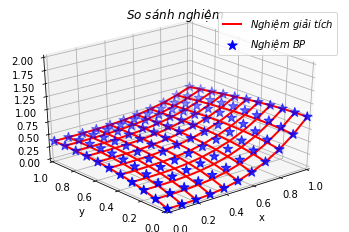

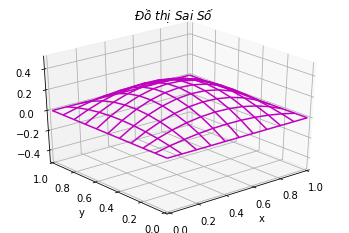

In [50]:
#vẽ 4 biểu đồ 

drawFunc("${Đồ\ thị\ nghiệm\ giải\ tích}$",xs,ys,Z1,0,2,False,'r')
drawFunc("${Đồ\ thị\ nghiệm\ Xấp\ xỉ\ BP}$",xs,ys,Z2,0,2,False,'b')        
draw2Func("${So\ sánh\ nghiệm}$",xs,ys,Z1,Z2,0,2,False)
Zloss = Z2-Z1
drawFunc("${Đồ\ thị\ Sai\ Số}$",xs,ys,Zloss,-0.5,0.5,False,'m')
#drawFunc("${Đồ\ thị\ Sai\ Số}$",xs,ys,Zloss,-0.0000075,0.0000075,True,'m')


In [51]:
#So sanh nghiêm chính xác và nghiệm xấp xỉ        ")
print('  x1        x2               y               y_BP      err_BP')
print('-----------------------------------------------------------------')
for i in range(k):
    x = np.array([xs[i],ys[i]])
    y = solution(x)
    y_BP = yTrial(x,net_out) 
    
    #print("%0.4f\t%8.4f\t%0.10f\t%0.10f\t%0.4f"%(x[0],x[1],y,y_BP,y_BP-y))
    print("%0.4f\t%8.4f\t%.10f\t%.10f\t%.2e"%(x[0],x[1],y,y_BP,abs(y_BP-y)))


  x1        x2               y               y_BP      err_BP
-----------------------------------------------------------------
0.0000	  0.0000	0.0000000000	0.0000000000	0.00e+00
0.1000	  0.1000	0.0913885792	0.1312673324	3.99e-02
0.2000	  0.2000	0.1702959966	0.2957992485	1.26e-01
0.3000	  0.3000	0.2422475582	0.4576005958	2.15e-01
0.4000	  0.4000	0.3110285014	0.5912884550	2.80e-01
0.5000	  0.5000	0.3790816623	0.6821663450	3.03e-01
0.6000	  0.6000	0.4478302951	0.7262899551	2.78e-01
0.7000	  0.7000	0.5179384719	0.7305253426	2.13e-01
0.8000	  0.8000	0.5895196009	0.7126004371	1.23e-01
0.9000	  0.9000	0.6623019757	0.7011505968	3.88e-02
1.0000	  1.0000	0.7357588823	0.7357588823	0.00e+00
